In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [ ]:
labelencoder=LabelEncoder()
data['Made_Purchase']=labelencoder.fit_transform(data['Made_Purchase'])
data['Month_SeasonalPurchase']=labelencoder.fit_transform(data['Month_SeasonalPurchase'])
data['CustomerType']=labelencoder.fit_transform(data['CustomerType'])
data['Cookies Setting']=labelencoder.fit_transform(data['Cookies Setting'])
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,2,Not Specified,1,Not Specified,Other,0.0,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,2,Female,1,Others,Married,0.0,0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,2,Female,0,Others,Married,1.0,0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,2,Male,0,Diploma,Single,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,2,Male,1,Diploma,Other,1.0,0


In [ ]:
data=data.drop(['Education','Gender','Marital Status'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14731 non-null  int64  
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [ ]:
data.groupby('Made_Purchase').agg(['mean','median'])

HomePage        HomePage_Duration        LandingPage         \
                   mean median              mean median        mean median   
Made_Purchase                                                                
0              2.114540    0.0         73.337327    0.0    0.448345    0.0   
1              2.467607    1.0         88.836944   15.0    0.558608    0.0   

              LandingPage_Duration        ProductDescriptionPage         ...  \
                              mean median                   mean median  ...   
Made_Purchase                                                            ...   
0                        30.446515    0.0              29.132027   16.0  ...   
1                        38.266633    0.0              35.436089   20.0  ...   

                   Zone        Type of Traffic        CustomerType         \
                   mean median            mean median         mean median   
Made_Purchase                                                               
0              3.176772    3.0        4.103775    2.0     1.761390    2.0   
1              3.121956    3.0        4.068307    2.0     1.707907    2.0   

              Cookies Setting        WeekendPurchase         
                         mean median            mean median  
Made_Purchase                                                
0                    1.022394    1.0        0.230495    0.0  
1                    1.034592    1.0        0.240000    0.0  

[2 rows x 36 columns]

In [ ]:
total=data.isna().sum().sort_values(ascending=False)
percent1=data.isna().sum()/data.isna().count()*100
percent2=(round(percent1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent2],axis=1,keys=['Total missing values','%'])
missing_data

,Total missing values,%
ProductDescriptionPage_Duration,167,1.1
HomePage,153,1.0
LandingPage,153,1.0
GoogleMetric:Bounce Rates,151,1.0
HomePage_Duration,150,1.0
SeasonalPurchase,150,1.0
Type of Traffic,143,1.0
LandingPage_Duration,135,0.9
OS,134,0.9
GoogleMetric:Page Values,132,0.9


In [ ]:
data = data.fillna(method='ffill')
data=data.dropna()
data.shape

(14731, 19)

In [ ]:
data.groupby('Made_Purchase').agg(['mean','median'])

HomePage        HomePage_Duration        LandingPage         \
                   mean median              mean median        mean median   
Made_Purchase                                                                
0              2.112852    0.0         73.190336    0.0    0.447656    0.0   
1              2.464525    1.0         89.242617   15.0    0.560890    0.0   

              LandingPage_Duration        ProductDescriptionPage         ...  \
                              mean median                   mean median  ...   
Made_Purchase                                                            ...   
0                        30.621187    0.0              29.182681   16.0  ...   
1                        38.116525    0.0              35.388987   20.0  ...   

                   Zone        Type of Traffic        CustomerType         \
                   mean median            mean median         mean median   
Made_Purchase                                                               
0              3.178047    3.0        4.105461    2.0     1.761390    2.0   
1              3.122132    3.0        4.059301    2.0     1.707907    2.0   

              Cookies Setting        WeekendPurchase         
                         mean median            mean median  
Made_Purchase                                                
0                    1.022394    1.0        0.231660    0.0  
1                    1.034592    1.0        0.239146    0.0  

[2 rows x 36 columns]

Text(0.5, 1.0, 'Before Outlier Removal')

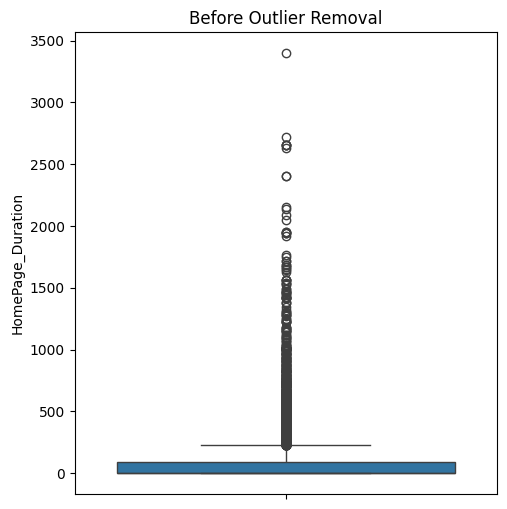

In [ ]:
column = 'HomePage_Duration'

# Plot before outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data[column])
plt.title('Before Outlier Removal')

In [ ]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
print("The IQR of each column is \n",IQR)

The IQR of each column is 
 HomePage                              3.000000
HomePage_Duration                    91.000000
LandingPage                           0.000000
LandingPage_Duration                  0.000000
ProductDescriptionPage               31.000000
ProductDescriptionPage_Duration    1260.123333
GoogleMetric:Bounce Rates             0.018160
GoogleMetric:Exit Rates               0.035500
GoogleMetric:Page Values              0.000000
SeasonalPurchase                      0.000000
Month_SeasonalPurchase                2.000000
OS                                    1.000000
SearchEngine                          0.000000
Zone                                  3.000000
Type of Traffic                       2.000000
CustomerType                          0.000000
Cookies Setting                       2.000000
WeekendPurchase                       0.000000
Made_Purchase                         1.000000
dtype: float64


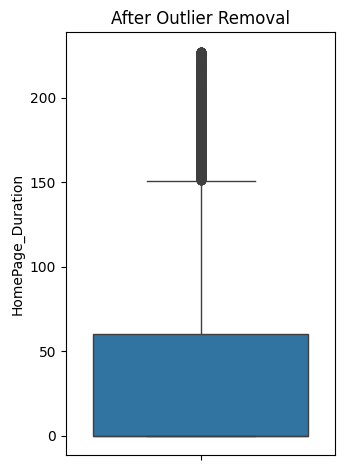

In [ ]:
data=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR)))]
# Plot after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(y=data[column])
plt.title('After Outlier Removal')

plt.tight_layout()
plt.show()

In [ ]:
data_Stand=data.drop(['Month_SeasonalPurchase','OS','SearchEngine','Zone','Type of Traffic','CustomerType','Cookies Setting','WeekendPurchase','Made_Purchase'],axis=1)
std_scaler=StandardScaler()
num_std=std_scaler.fit_transform(data_Stand)
num_std_df = pd.DataFrame(num_std, columns=data_Stand.columns)
num_std_df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase
0,-0.743293,-0.65676,0.0,0.0,-1.057834,-0.977667,NaN,NaN,0.0,0.0
1,-0.743293,-0.65676,0.0,0.0,-1.006035,-0.974263,NaN,NaN,0.0,0.0
2,-0.743293,-0.65676,0.0,0.0,-0.591641,-0.176602,1.282726,0.847346,0.0,0.0
3,-0.743293,-0.65676,0.0,0.0,-1.057834,-0.977667,NaN,NaN,0.0,NaN
4,-0.247581,-0.65676,0.0,0.0,-1.109633,-0.977667,NaN,NaN,0.0,0.0


In [ ]:
dataE=data[['Month_SeasonalPurchase','OS','SearchEngine','Zone','Type of Traffic','CustomerType','Cookies Setting','WeekendPurchase','Made_Purchase']]
data_fixed=pd.concat([num_std_df,dataE],axis=1)
data_fixed.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Cookies Setting,WeekendPurchase,Made_Purchase
0,-0.743293,-0.65676,0.0,0.0,-1.057834,-0.977667,NaN,NaN,0.0,0.0,2.0,4.0,NaN,NaN,3.0,2.0,1,0.0,0
1,-0.743293,-0.65676,0.0,0.0,-1.006035,-0.974263,NaN,NaN,0.0,0.0,2.0,3.0,2.0,2.0,4.0,2.0,1,0.0,0
2,-0.743293,-0.65676,0.0,0.0,-0.591641,-0.176602,1.282726,0.847346,0.0,0.0,2.0,3.0,NaN,1.0,4.0,2.0,0,NaN,0
3,-0.743293,-0.65676,0.0,0.0,-1.057834,-0.977667,NaN,NaN,0.0,NaN,2.0,2.0,NaN,3.0,3.0,2.0,0,0.0,0
4,-0.247581,-0.65676,0.0,0.0,-1.109633,-0.977667,NaN,NaN,0.0,0.0,2.0,1.0,2.0,1.0,5.0,2.0,1,NaN,0


In [ ]:
data_fixed.isna().sum()

HomePage                           1202
HomePage_Duration                  1402
LandingPage                        3088
LandingPage_Duration               2815
ProductDescriptionPage             1182
ProductDescriptionPage_Duration    1168
GoogleMetric:Bounce Rates          1850
GoogleMetric:Exit Rates            1427
GoogleMetric:Page Values           2836
SeasonalPurchase                   1564
Month_SeasonalPurchase             2523
OS                                  134
SearchEngine                       5265
Zone                                606
Type of Traffic                    2542
CustomerType                       2181
Cookies Setting                       0
WeekendPurchase                    3455
Made_Purchase                         0
dtype: int64

In [ ]:
data_fixed = data_fixed.fillna(method='ffill')
data_fixed=data_fixed.dropna()
data.shape

(14731, 19)

In [ ]:
y=data_fixed['Made_Purchase']
x=data_fixed.drop('Made_Purchase',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
fold=KFold(n_splits=5,shuffle=True,random_state=1)
rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=None)
params={'n_features_to_select':list(range(1,20))}
model_cv=GridSearchCV(estimator=rfe,param_grid=params,scoring='accuracy',verbose=1,cv=fold,return_train_score=True)
model_cv.fit(x_train,y_train)
best_params = model_cv.best_params_
print(best_params)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
{'n_features_to_select': 12}


In [ ]:
feature_ranking = model_cv.best_estimator_.ranking_
selected_feature_indices = feature_ranking == 1
print("Selected feature indices:",selected_feature_indices )

Selected feature indices: [ True  True False False  True  True  True  True False False  True  True
 False  True  True False  True  True]


In [ ]:
x.head

<bound method NDFrame.head of        HomePage  HomePage_Duration  LandingPage  LandingPage_Duration  \
2     -0.743293          -0.656760          0.0                   0.0   
3     -0.743293          -0.656760          0.0                   0.0   
4     -0.247581          -0.656760          0.0                   0.0   
5     -0.743293          -0.656760          0.0                   0.0   
6     -0.743293          -0.656760          0.0                   0.0   
...         ...                ...          ...                   ...   
14726 -0.247581          -0.585548          0.0                   0.0   
14727 -0.247581           1.426602          0.0                   0.0   
14728  0.248131           0.689139          0.0                   0.0   
14729 -0.743293          -0.656760          0.0                   0.0   
14730 -0.743293          -0.656760          0.0                   0.0   

       ProductDescriptionPage  ProductDescriptionPage_Duration  \
2                   -0.5916

In [ ]:
Y=data_fixed['Made_Purchase']
X = data_fixed.drop(['Made_Purchase', 'LandingPage', 'LandingPage_Duration', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'SearchEngine', 'CustomerType'], axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
random_forest=RandomForestClassifier(n_estimators=100,random_state=0)
random_forest.fit(X_train,Y_train)
y_predictions=random_forest.predict(X_train)
random_forest.score(X_train,Y_train)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)
print(acc_random_forest)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

91.99
[[6857  346]
 [ 598 3982]]
              precision    recall  f1-score   support

           0      0.920     0.952     0.936      7203
           1      0.920     0.869     0.894      4580

    accuracy                          0.920     11783
   macro avg      0.920     0.911     0.915     11783
weighted avg      0.920     0.920     0.919     11783



In [ ]:
y_predictions=random_forest.predict(X_test)
random_forest.score(X_test,Y_test)
acc_random_forest_test=round(random_forest.score(X_test,Y_test)*100,2)
print(acc_random_forest_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

51.32
[[1303  557]
 [ 877  209]]
              precision    recall  f1-score   support

           0      0.598     0.701     0.645      1860
           1      0.273     0.192     0.226      1086

    accuracy                          0.513      2946
   macro avg      0.435     0.446     0.435      2946
weighted avg      0.478     0.513     0.490      2946



In [ ]:
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
y_predictions=gaussian.predict(X_train)
gaussian.score(X_train,Y_train)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
print(acc_gaussian)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

59.08
[[6043 1160]
 [3662  918]]
              precision    recall  f1-score   support

           0      0.623     0.839     0.715      7203
           1      0.442     0.200     0.276      4580

    accuracy                          0.591     11783
   macro avg      0.532     0.520     0.495     11783
weighted avg      0.552     0.591     0.544     11783



In [ ]:
gaussian=GaussianNB()
gaussian.fit(X_test,Y_test)
y_predictions=gaussian.predict(X_test)
gaussian.score(X_test,Y_test)
acc_gaussian_test=round(gaussian.score(X_test,Y_test)*100,2)
print(acc_gaussian_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

61.2
[[1578  282]
 [ 861  225]]
              precision    recall  f1-score   support

           0      0.647     0.848     0.734      1860
           1      0.444     0.207     0.282      1086

    accuracy                          0.612      2946
   macro avg      0.545     0.528     0.508      2946
weighted avg      0.572     0.612     0.568      2946



In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
y_predictions=logreg.predict(X_train)
logreg.score(X_train,Y_train)
acc_logreg=round(logreg.score(X_train,Y_train)*100,2)
print(acc_logreg)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

61.15
[[7196    7]
 [4571    9]]
              precision    recall  f1-score   support

           0      0.612     0.999     0.759      7203
           1      0.562     0.002     0.004      4580

    accuracy                          0.611     11783
   macro avg      0.587     0.500     0.381     11783
weighted avg      0.592     0.611     0.465     11783



In [ ]:
logreg=LogisticRegression()
logreg.fit(X_test,Y_test)
y_predictions=logreg.predict(X_test)
logreg.score(X_test,Y_test)
acc_logreg_test=round(logreg.score(X_test,Y_test)*100,2)
print(acc_logreg_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

63.07
[[1850   10]
 [1078    8]]
              precision    recall  f1-score   support

           0      0.632     0.995     0.773      1860
           1      0.444     0.007     0.014      1086

    accuracy                          0.631      2946
   macro avg      0.538     0.501     0.394      2946
weighted avg      0.563     0.631     0.493      2946



In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train,Y_train)
y_predictions=decisiontree.predict(X_train)
decisiontree.score(X_train,Y_train)
acc_decisiontree=round(decisiontree.score(X_train,Y_train)*100,2)
print(acc_decisiontree)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

91.99
[[7180   23]
 [ 921 3659]]
              precision    recall  f1-score   support

           0      0.886     0.997     0.938      7203
           1      0.994     0.799     0.886      4580

    accuracy                          0.920     11783
   macro avg      0.940     0.898     0.912     11783
weighted avg      0.928     0.920     0.918     11783



In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_test,Y_test)
y_predictions=decisiontree.predict(X_test)
decisiontree.score(X_test,Y_test)
acc_decisiontree_test=round(decisiontree.score(X_test,Y_test)*100,2)
print(acc_decisiontree_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

97.42
[[1860    0]
 [  76 1010]]
              precision    recall  f1-score   support

           0      0.961     1.000     0.980      1860
           1      1.000     0.930     0.964      1086

    accuracy                          0.974      2946
   macro avg      0.980     0.965     0.972      2946
weighted avg      0.975     0.974     0.974      2946



In [ ]:
svc=LinearSVC()
svc.fit(X_train,Y_train)
y_predictions=svc.predict(X_train)
svc.score(X_train,Y_train)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
print(acc_svc)
con=confusion_matrix(Y_train,y_predictions)
print(con)
print(classification_report(Y_train,y_predictions,digits=3))

61.14
[[7196    7]
 [4572    8]]
              precision    recall  f1-score   support

           0      0.611     0.999     0.759      7203
           1      0.533     0.002     0.003      4580

    accuracy                          0.611     11783
   macro avg      0.572     0.500     0.381     11783
weighted avg      0.581     0.611     0.465     11783



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svc=LinearSVC()
svc.fit(X_test,Y_test)
y_predictions=svc.predict(X_test)
svc.score(X_test,Y_test)
acc_svc_test=round(svc.score(X_test,Y_test)*100,2)
print(acc_svc_test)
con=confusion_matrix(Y_test,y_predictions)
print(con)
print(classification_report(Y_test,y_predictions,digits=3))

63.07
[[1852    8]
 [1080    6]]
              precision    recall  f1-score   support

           0      0.632     0.996     0.773      1860
           1      0.429     0.006     0.011      1086

    accuracy                          0.631      2946
   macro avg      0.530     0.501     0.392      2946
weighted avg      0.557     0.631     0.492      2946



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_test)
acc_svm_test = round(accuracy_score(Y_test, svm_predictions) * 100, 2)
print(f"SVM Test Accuracy: {acc_svm_test}%")
print(confusion_matrix(Y_test, svm_predictions))
print(classification_report(Y_test, svm_predictions, digits=3))

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, Y_train)
xgb_predictions = xgb_model.predict(X_test)
acc_xgb_test = round(accuracy_score(Y_test, xgb_predictions) * 100, 2)
print(f"XGBoost Test Accuracy: {acc_xgb_test}%")
print(confusion_matrix(Y_test, xgb_predictions))
print(classification_report(Y_test, xgb_predictions, digits=3))


SVM Test Accuracy: 63.14%
[[1860    0]
 [1086    0]]
              precision    recall  f1-score   support

           0      0.631     1.000     0.774      1860
           1      0.000     0.000     0.000      1086

    accuracy                          0.631      2946
   macro avg      0.316     0.500     0.387      2946
weighted avg      0.399     0.631     0.489      2946



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost Test Accuracy: 54.41%
[[1353  507]
 [ 836  250]]
              precision    recall  f1-score   support

           0      0.618     0.727     0.668      1860
           1      0.330     0.230     0.271      1086

    accuracy                          0.544      2946
   macro avg      0.474     0.479     0.470      2946
weighted avg      0.512     0.544     0.522      2946



In [ ]:
results = pd.DataFrame({
    'Model': [
        'Random Forest',
        'Gaussian',
        'Logistic Regression',
        'Decision Tree',
        'LinearSVC',
        'SVM',
        'XGBoost'
    ],
    'Training Score': [
        acc_random_forest,
        acc_gaussian,
        acc_logreg,
        acc_decisiontree,
        acc_svc,
        acc_svm_test,
        acc_xgb_test
    ]
})

result_df = results.sort_values(by='Training Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Training Score
Model,
Random Forest,91.99
Decision Tree,91.99
SVM,63.14
Logistic Regression,61.15
LinearSVC,61.14
Gaussian,59.08
XGBoost,54.41


In [ ]:

results = pd.DataFrame({
    'Model': [
        'Random Forest',
        'Gaussian',
        'Logistic Regression',
        'Decision Tree',
        'LinearSVC',
        'SVM',
        'XGBoost'
    ],
    'Testing Score': [
        acc_random_forest_test,
        acc_gaussian_test,
        acc_logreg_test,
        acc_decisiontree_test,
        acc_svc_test,
        acc_svm_test,
        acc_xgb_test
    ]
})

result_df = results.sort_values(by='Testing Score', ascending=False)
result_df = result_df.set_index('Model')
result_df


,Testing Score
Model,
Decision Tree,97.42
SVM,63.14
Logistic Regression,63.07
LinearSVC,63.07
Gaussian,61.20
XGBoost,54.41
Random Forest,51.32
